In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Athelete.csv')

print(df.shape)
print(df.head())


(3111, 28)
              Athlete        Date Day.of.Week   RHR    HRV  Recovery  \
0  Athlete 1 Bergdorf  01-01-2022         NaN   NaN    NaN       NaN   
1  Athlete 1 Bergdorf  01-10-2022      Monday  48.0  120.0      58.0   
2  Athlete 1 Bergdorf  01-11-2022         NaN   NaN    NaN       NaN   
3  Athlete 1 Bergdorf  01-12-2022         NaN   NaN    NaN       NaN   
4  Athlete 1 Bergdorf   1/13/2022    Thursday  53.0  121.0      61.0   

   Sleep.Score  Hours.in.Bed  Hours.of.Sleep  Sleep.Need  ...  Awake..hours.  \
0          NaN           NaN             NaN         NaN  ...            NaN   
1         51.0          6.36            5.62       11.02  ...           0.74   
2          NaN           NaN             NaN         NaN  ...            NaN   
3          NaN           NaN             NaN         NaN  ...            NaN   
4         55.0          6.25            5.56       10.15  ...           0.70   

   Sleep.Debt..hours.  Sleep.Consistency  Respiratory.Rate  \
0            

In [5]:
print(df.describe())
print(df.info())


               RHR          HRV     Recovery  Sleep.Score  Hours.in.Bed  \
count  1981.000000  1981.000000  1981.000000  1981.000000   1981.000000   
mean     59.693084    84.065623    59.546189    76.393236      7.780843   
std       9.003574    36.105314    22.664673    18.553590      1.927197   
min      39.000000    14.000000     1.000000    10.000000      1.050000   
25%      53.000000    56.000000    43.000000    64.000000      6.580000   
50%      58.000000    79.000000    61.000000    78.000000      7.800000   
75%      65.000000   110.000000    77.000000    92.000000      8.960000   
max     120.000000   188.000000    99.000000   100.000000     17.130000   

       Hours.of.Sleep   Sleep.Need  Sleep.Efficiency....  Wake.Periods  \
count     1981.000000  1981.000000           1981.000000   1621.000000   
mean         6.890545     8.910611             88.865724     14.870450   
std          1.652425     1.117639              6.296796      6.613342   
min          0.820000     1.

In [6]:
for column in df.columns:
    print(f"Column '{column}': {df[column].isna().sum()} null values")

Column 'Athlete': 0 null values
Column 'Date': 0 null values
Column 'Day.of.Week': 1124 null values
Column 'RHR': 1130 null values
Column 'HRV': 1130 null values
Column 'Recovery': 1130 null values
Column 'Sleep.Score': 1130 null values
Column 'Hours.in.Bed': 1130 null values
Column 'Hours.of.Sleep': 1130 null values
Column 'Sleep.Need': 1130 null values
Column 'Sleep.Efficiency....': 1130 null values
Column 'Wake.Periods': 1490 null values
Column 'Sleep.Disturbances': 1130 null values
Column 'Latency..min.': 1130 null values
Column 'Cycles': 1130 null values
Column 'REM.Sleep..hours.': 1130 null values
Column 'Deep.Sleep..hours.': 1130 null values
Column 'Light.Sleep..hours.': 1130 null values
Column 'Awake..hours.': 1130 null values
Column 'Sleep.Debt..hours.': 1130 null values
Column 'Sleep.Consistency': 1401 null values
Column 'Respiratory.Rate': 1134 null values
Column 'Total.Cycle.Sleep.Time..hours.': 1130 null values
Column 'REM.Percentage': 1130 null values
Column 'Deep.Sleep.P

In [7]:
df = df.dropna(how='all')
df.shape

(3111, 28)

In [8]:
for column in df.columns:
      if df[column].dtype == 'object':
        df.drop(column, axis=1, inplace=True)

print(df.shape)

(3111, 25)


In [9]:
df.to_csv('cleaned_data_Athelete.csv', index=False)

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

imputer = IterativeImputer(estimator=xgb.XGBRegressor(n_estimators=200, learning_rate = 0.05 ,random_state=42),max_iter=15 ,random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


df_imputed.to_csv('Athelete_imputed.csv', index=False)

print(df_imputed.shape)

print(df_imputed.head())

df_imputed.info()

(3111, 25)
         RHR         HRV   Recovery  Sleep.Score  Hours.in.Bed  \
0  53.814453   79.523544  65.397011      71.0728      8.029248   
1  48.000000  120.000000  58.000000      51.0000      6.360000   
2  53.814453   79.523544  65.397011      71.0728      8.029248   
3  53.814453   79.523544  65.397011      71.0728      8.029248   
4  53.000000  121.000000  61.000000      55.0000      6.250000   

   Hours.of.Sleep  Sleep.Need  Sleep.Efficiency....  Wake.Periods  \
0         7.02352    9.851141             87.128319     18.580381   
1         5.62000   11.020000             88.000000      7.000000   
2         7.02352    9.851141             87.128319     18.580381   
3         7.02352    9.851141             87.128319     18.580381   
4         5.56000   10.150000             89.000000      8.000000   

   Sleep.Disturbances  ...  Awake..hours.  Sleep.Debt..hours.  \
0           16.396738  ...       1.049594            1.357255   
1            6.000000  ...       0.740000      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


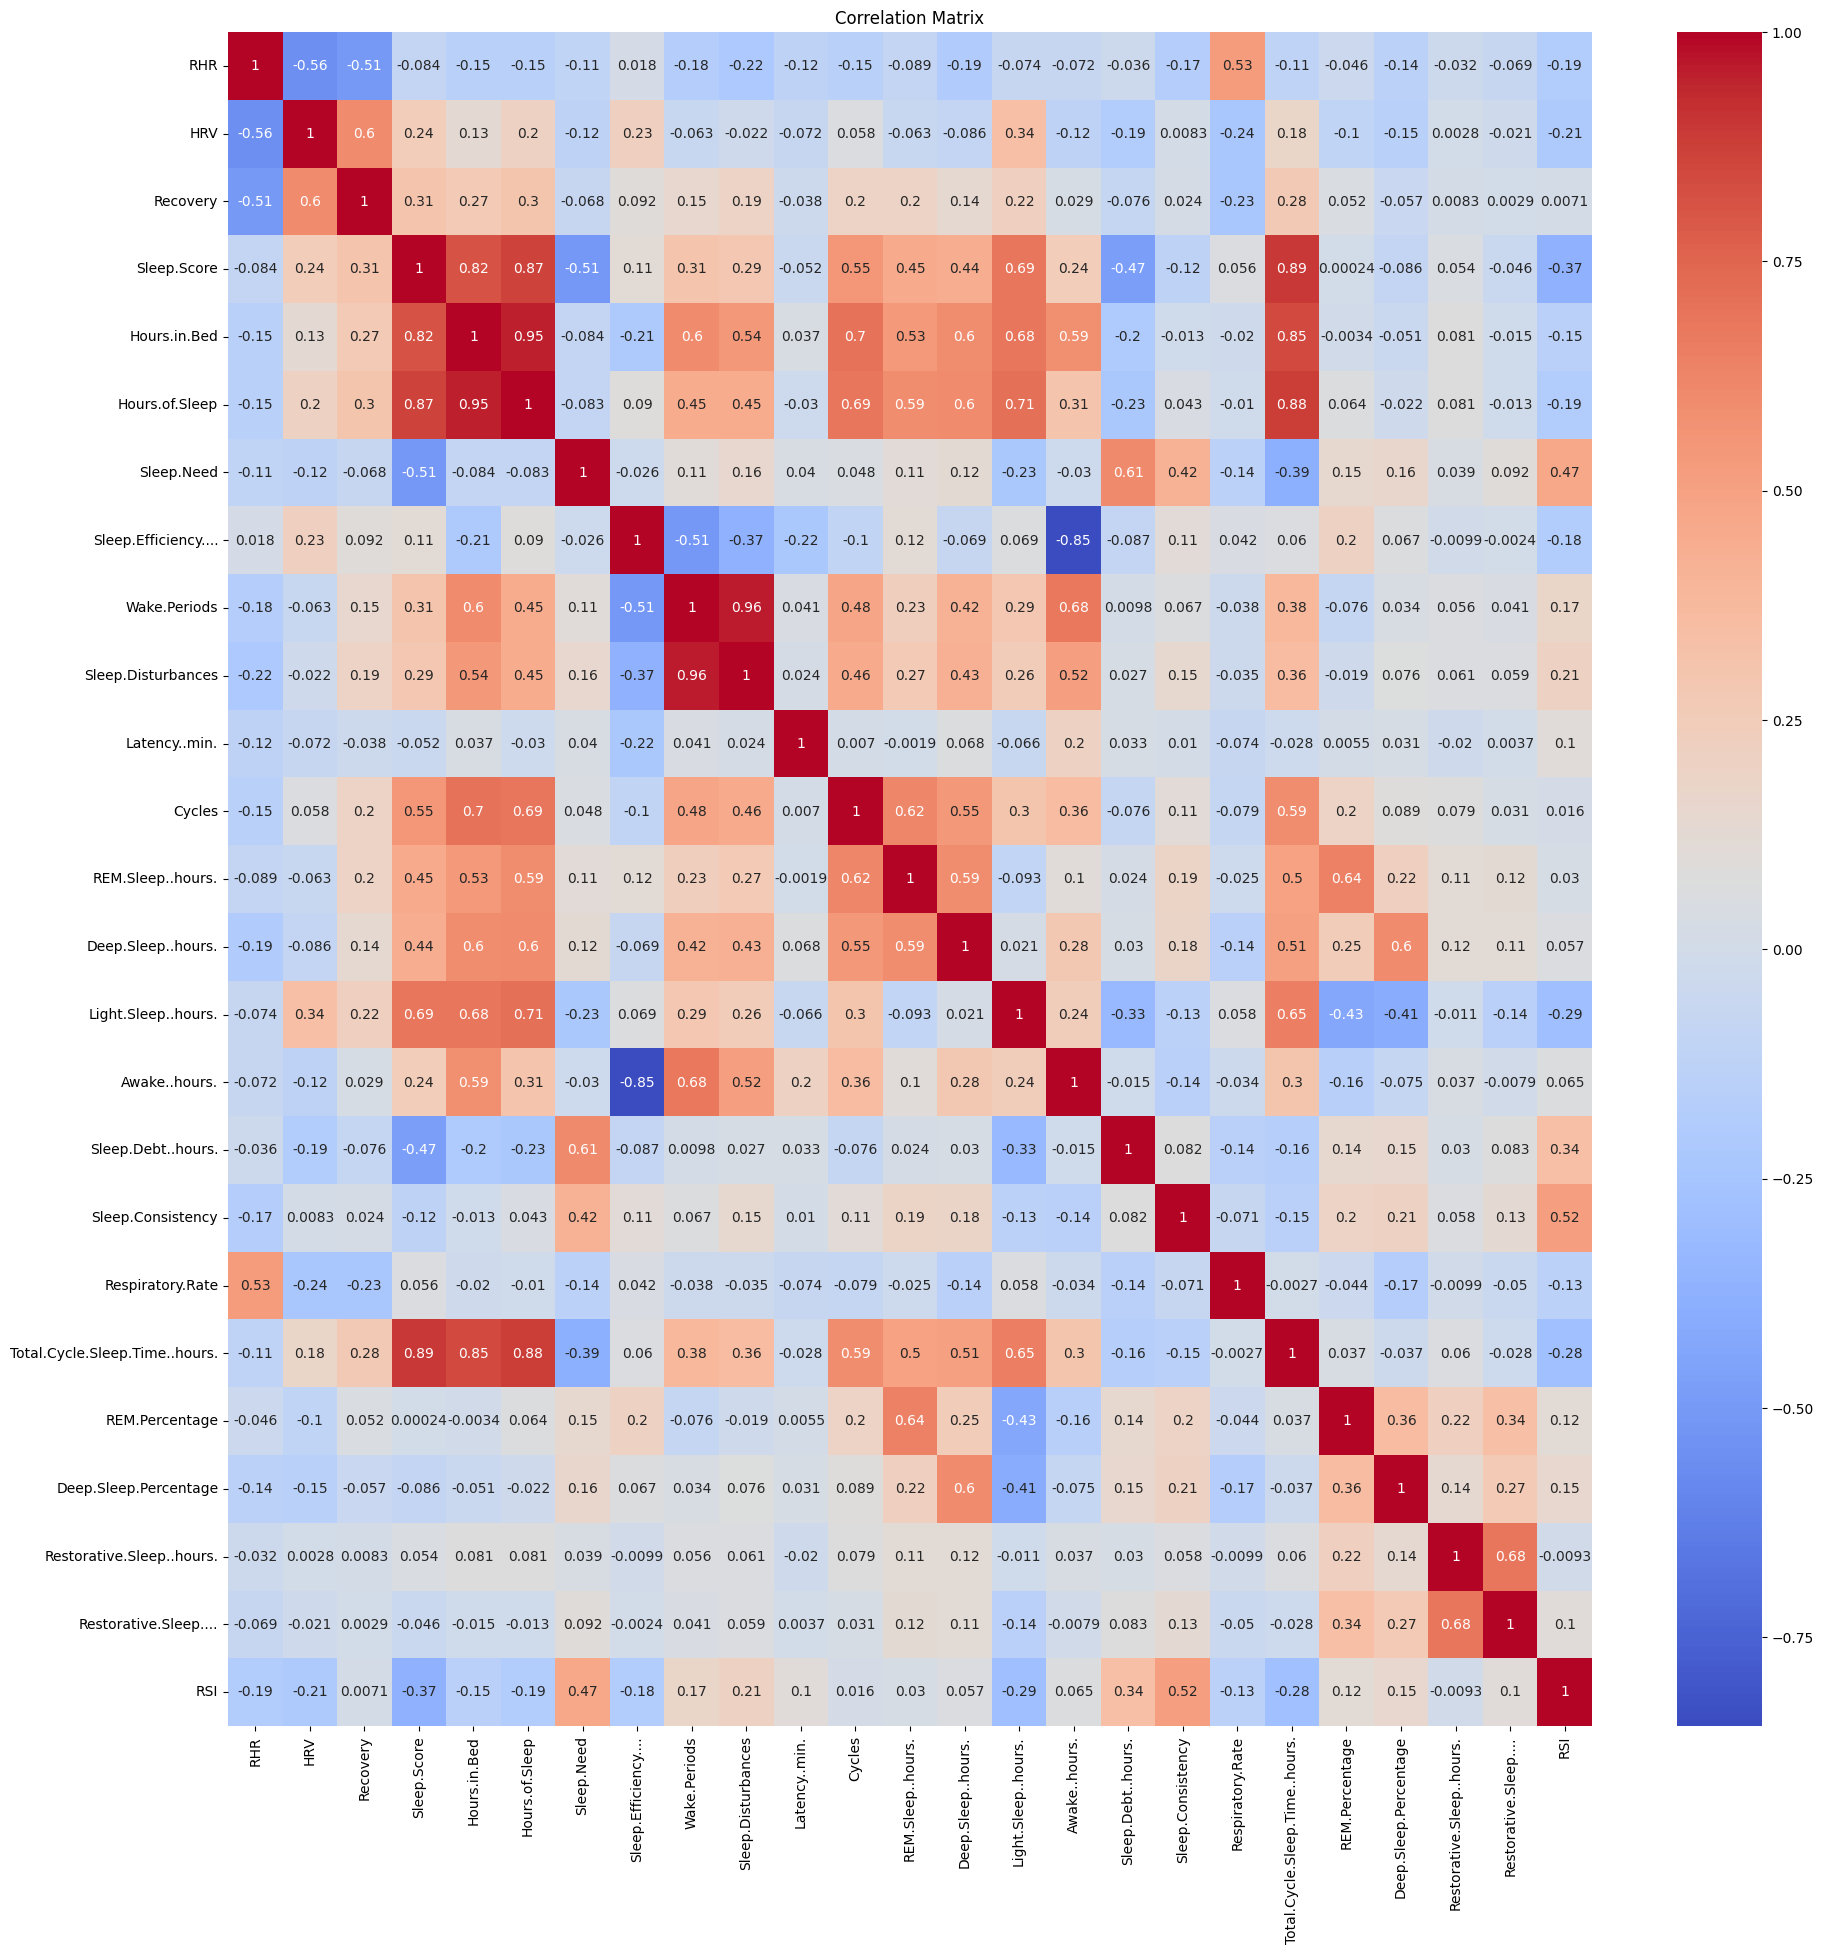

In [11]:
import seaborn as sns

fig = plt.figure(figsize=(22,22))
corr_matrix = df_imputed.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

print(df_scaled.shape)

print(df_scaled.head())

df_scaled.to_csv('Athelete_scaled.csv', index=False)


(3111, 25)
        RHR       HRV  Recovery  Sleep.Score  Hours.in.Bed  Hours.of.Sleep  \
0 -0.490795 -0.104581  0.199422    -0.229568      0.102299        0.063791   
1 -1.245194  1.294258 -0.203947    -1.566104     -0.980069       -0.999566   
2 -0.490795 -0.104581  0.199422    -0.229568      0.102299        0.063791   
3 -0.490795 -0.104581  0.199422    -0.229568      0.102299        0.063791   
4 -0.596467  1.328817 -0.040353    -1.299767     -1.051395       -1.045024   

   Sleep.Need  Sleep.Efficiency....  Wake.Periods  Sleep.Disturbances  ...  \
0    0.606221             -0.217486      0.508841            0.608955  ...   
1    1.777125             -0.046308     -1.569126           -1.460935  ...   
2    0.606221             -0.217486      0.508841            0.608955  ...   
3    0.606221             -0.217486      0.508841            0.608955  ...   
4    0.905603              0.150068     -1.389688           -1.261845  ...   

   Awake..hours.  Sleep.Debt..hours.  Sleep.Consist

In [13]:
from sklearn.feature_selection import RFE

X = df_scaled.drop(columns=['RSI'])  # Features (all columns except RSI)
y = df_scaled['RSI']  # Target variable

# Initialize model
model = xgb.XGBRegressor(n_estimators=200,learning_rate = 0.05,random_state=42)

n_features_to_select = 18  

selector = RFE(model, n_features_to_select=n_features_to_select)
X_reduced = selector.fit_transform(X, y)

selected_features = X.columns[selector.support_]


df_reduced = pd.DataFrame(X_reduced, columns=selected_features)
df_reduced['RSI'] = y.values

print(df_reduced.shape)
print(df_reduced.head())


(3111, 19)
        RHR       HRV  Recovery  Sleep.Score  Hours.of.Sleep  \
0 -0.490795 -0.104581  0.199422    -0.229568        0.063791   
1 -1.245194  1.294258 -0.203947    -1.566104       -0.999566   
2 -0.490795 -0.104581  0.199422    -0.229568        0.063791   
3 -0.490795 -0.104581  0.199422    -0.229568        0.063791   
4 -0.596467  1.328817 -0.040353    -1.299767       -1.045024   

   Sleep.Efficiency....  Wake.Periods  Sleep.Disturbances  REM.Sleep..hours.  \
0             -0.217486      0.508841            0.608955           0.320150   
1             -0.046308     -1.569126           -1.460935          -0.759727   
2             -0.217486      0.508841            0.608955           0.320150   
3             -0.217486      0.508841            0.608955           0.320150   
4              0.150068     -1.389688           -1.261845          -0.914376   

   Deep.Sleep..hours.  Light.Sleep..hours.  Awake..hours.  Sleep.Debt..hours.  \
0            0.459975            -0.297179

In [14]:
df_reduced.to_csv('Athelete_reduced.csv',index=False)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_reduced.drop(columns=["RSI"])
y = df_reduced["RSI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.48
Mean Squared Error: 0.46
R2 Score: 0.54


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model = RandomForestRegressor(n_estimators=200,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.19
Mean Squared Error: 0.12
R2 Score: 0.88


In [17]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"XGBoost R2 Score: {r2:.2f}")

Mean Absolute Error: 0.16
Mean Squared Error: 0.09
XGBoost R2 Score: 0.91


 98%|===================| 3064/3111 [00:25<00:00]        

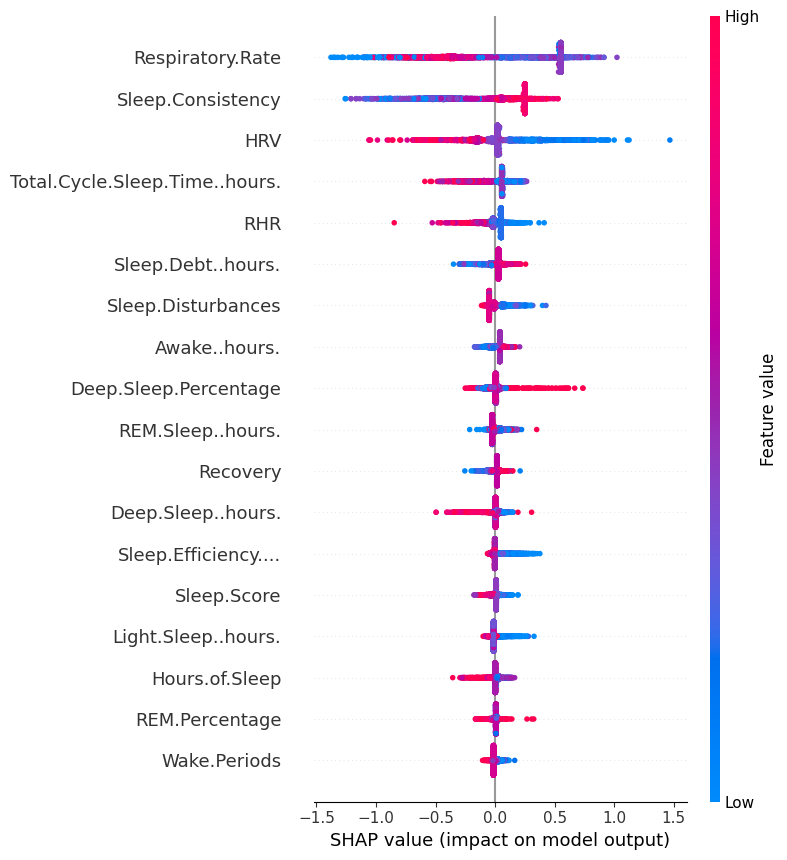

                           Feature  Importance
14                Respiratory.Rate    0.480434
13               Sleep.Consistency    0.293562
1                              HRV    0.178610
15  Total.Cycle.Sleep.Time..hours.    0.096652
0                              RHR    0.059742
12              Sleep.Debt..hours.    0.057385
7               Sleep.Disturbances    0.049276
11                   Awake..hours.    0.044617
17           Deep.Sleep.Percentage    0.033366
8                REM.Sleep..hours.    0.030786
2                         Recovery    0.027786
9               Deep.Sleep..hours.    0.026709
5             Sleep.Efficiency....    0.025458
3                      Sleep.Score    0.025340
10             Light.Sleep..hours.    0.024129
4                   Hours.of.Sleep    0.023740
16                  REM.Percentage    0.016565
6                     Wake.Periods    0.016529


In [18]:
import shap

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)

shap_importance = np.abs(shap_values.values).mean(axis=0)

feature_importance_array = np.array(list(zip(X.columns, shap_importance)))

shap_importance_df = pd.DataFrame(feature_importance_array, columns=["Feature", "Importance"])

shap_importance_df["Importance"] = shap_importance_df["Importance"].astype(float)
shap_importance_df = shap_importance_df.sort_values(by="Importance", ascending=False)

print(shap_importance_df)

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

top_12_features = shap_importance_df["Feature"].head(12).values

X_selected = X[top_12_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model_xgb = xgb.XGBRegressor(n_estimators=200, learning_rate = 0.05, random_state=42)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# print(top_12_features)


Mean Absolute Error: 0.17
Mean Squared Error (MSE): 0.09
R-squared (R²): 0.91


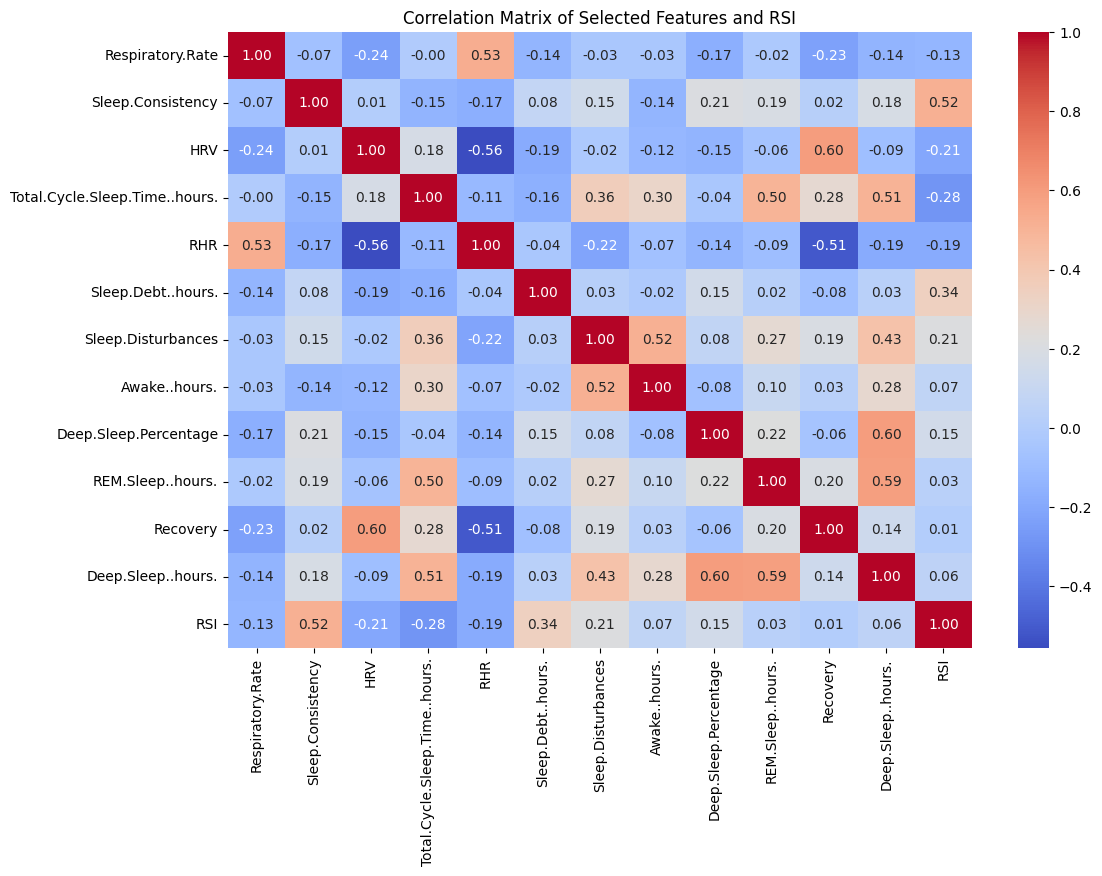

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['Respiratory.Rate', 'Sleep.Consistency', 'HRV',
                     'Total.Cycle.Sleep.Time..hours.', 'RHR', 'Sleep.Debt..hours.',
                     'Sleep.Disturbances', 'Awake..hours.', 'Deep.Sleep.Percentage',
                     'REM.Sleep..hours.', 'Recovery', 'Deep.Sleep..hours.', 'RSI']

corr_matrix = df_reduced[selected_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Features and RSI")
plt.show()


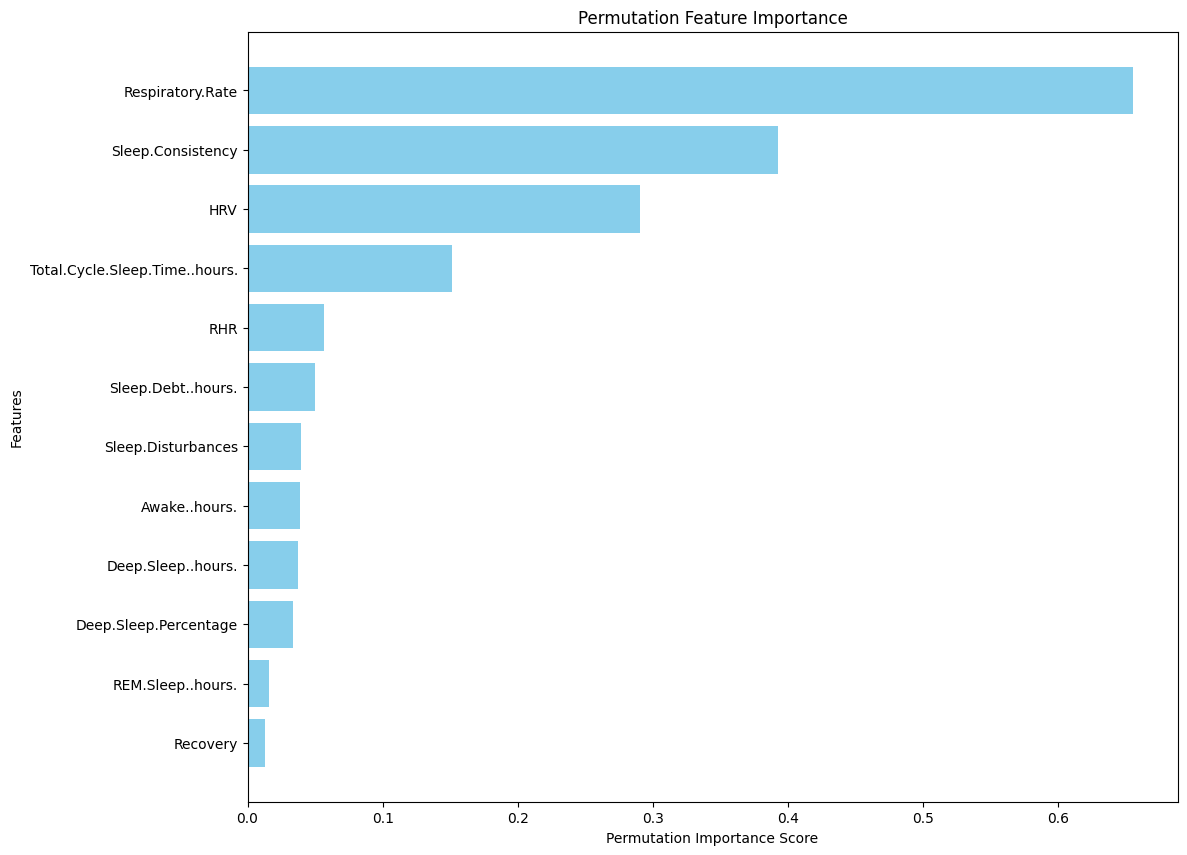

In [21]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

perm_importance = permutation_importance(model_xgb, df_reduced[selected_features[:-1]], df_reduced['RSI'], scoring="r2")


sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]
features_sorted = [selected_features[:-1][i] for i in sorted_idx]


plt.figure(figsize=(12, 10))
plt.barh(features_sorted, perm_importance.importances_mean[sorted_idx], color="skyblue")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Features")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()  
plt.show()

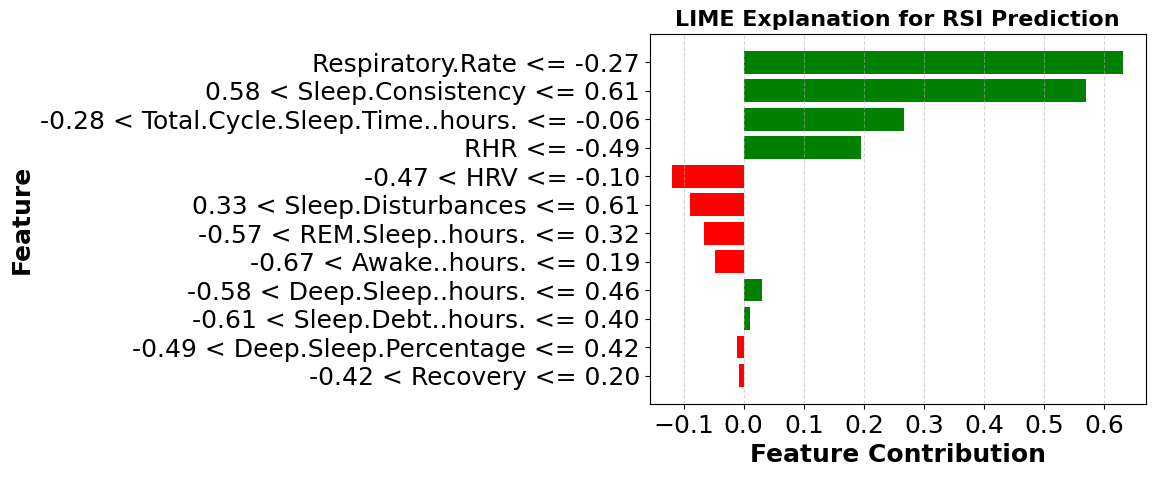

In [22]:
import numpy as np
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt


np.random.seed(42)

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=df_reduced[selected_features[:-1]].values,
    feature_names=selected_features[:-1],
    class_names=["RSI"],  
    mode="regression"
)

exp = explainer.explain_instance(
    df_reduced[selected_features[:-1]].iloc[0].values,
    model_xgb.predict,
    num_samples=3111 , 
    num_features=12
)

fig = exp.as_pyplot_figure()


plt.gcf().set_facecolor("white")  
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Feature Contribution", fontsize=18, fontweight="bold")
plt.ylabel("Feature", fontsize=18, fontweight="bold")
plt.title("LIME Explanation for RSI Prediction", fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)  
plt.show()


In [23]:
selected_features_cluster = ['Respiratory.Rate', 'Sleep.Consistency', 'HRV',
                     'Total.Cycle.Sleep.Time..hours.']
# selected_features_cluster = ['Respiratory.Rate', 'Sleep.Consistency']
df_cluster = df_reduced[selected_features_cluster+['RSI']]
df_cluster.head()

,Respiratory.Rate,Sleep.Consistency,HRV,Total.Cycle.Sleep.Time..hours.,RSI
0,-0.273564,0.612964,-0.104581,-0.058804,0.893209
1,-3.518725,-1.029192,1.294258,-1.058209,-1.331599
2,-0.273564,0.612964,-0.104581,-0.058804,0.893209
3,-0.273564,0.612964,-0.104581,-0.058804,0.893209
4,-2.521415,-2.300273,1.328817,-1.100208,-1.347174


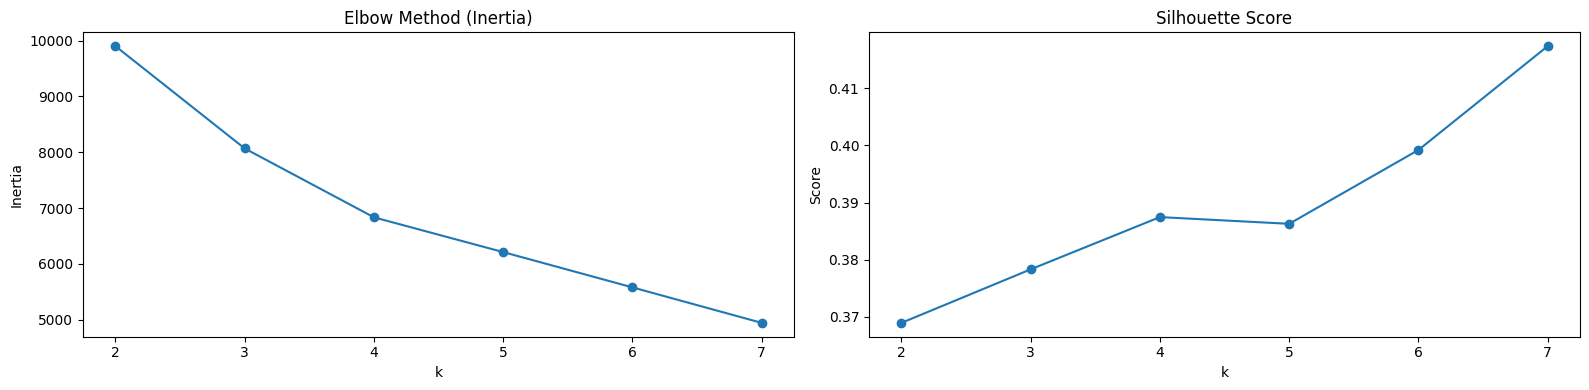

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
# db_scores = []
K = range(2,8)

df_cluster_2 = df_cluster.drop(columns=['RSI'])

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_cluster_2)

    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_cluster_2, cluster_labels))
    # db_scores.append(davies_bouldin_score(df_cluster_2, cluster_labels))

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')

# plt.subplot(1, 3, 3)
# plt.plot(K, db_scores, marker='o')
# plt.title('Davies-Bouldin Index')
# plt.xlabel('k')
# plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_cluster[selected_features_cluster])
df_cluster['cluster'] = cluster_labels
df_cluster.head()

/var/folders/3m/kwsp35zd7ln8cgd3tkjsk64h0000gn/T/ipykernel_32801/1677214281.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Respiratory.Rate,Sleep.Consistency,HRV,Total.Cycle.Sleep.Time..hours.,RSI,cluster
0,-0.273564,0.612964,-0.104581,-0.058804,0.893209,3
1,-3.518725,-1.029192,1.294258,-1.058209,-1.331599,0
2,-0.273564,0.612964,-0.104581,-0.058804,0.893209,3
3,-0.273564,0.612964,-0.104581,-0.058804,0.893209,3
4,-2.521415,-2.300273,1.328817,-1.100208,-1.347174,0


cluster
0     354
1     533
2     485
3    1739
Name: count, dtype: int64


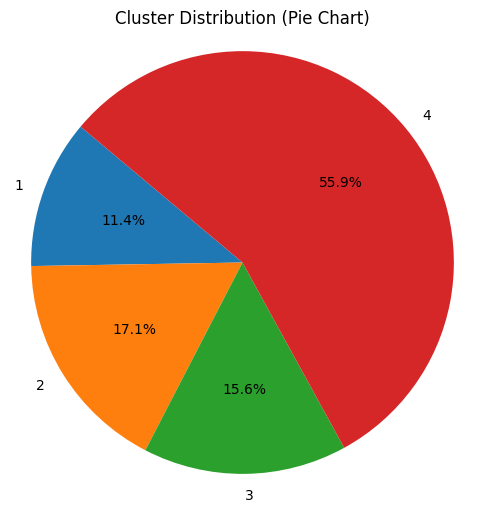

In [38]:
cluster_counts = df_cluster['cluster'].value_counts().sort_index()

print(cluster_counts)

plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index+1, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

In [39]:
mean_rsi = df_cluster.groupby('cluster')['RSI'].mean()
print(mean_rsi)



cluster
0   -0.751315
1   -0.968734
2   -0.239822
3    0.516742
Name: RSI, dtype: float64


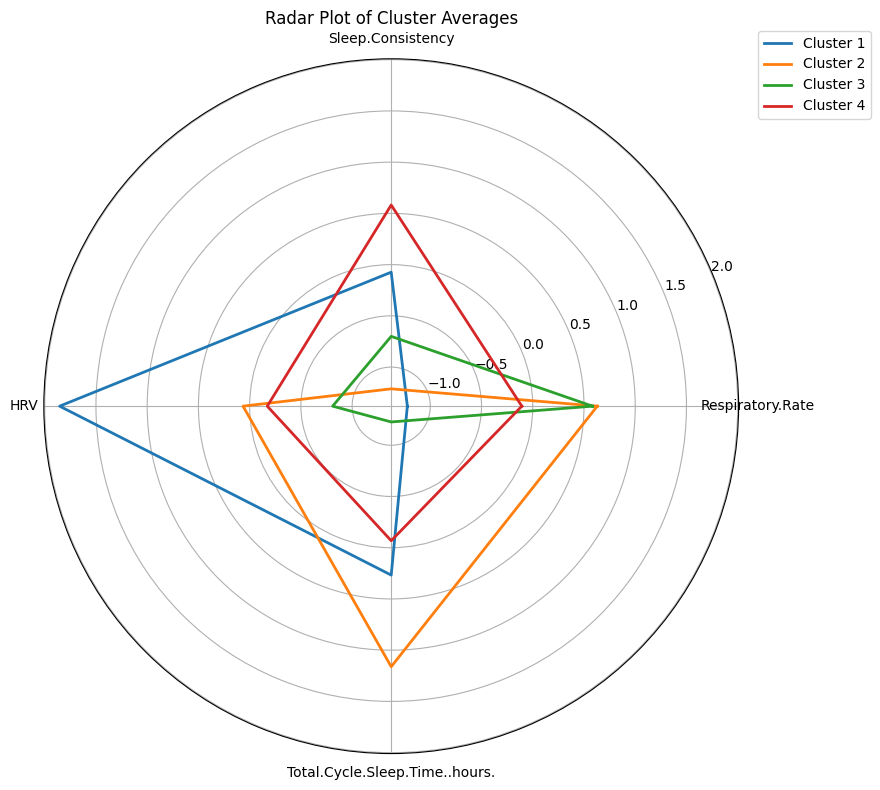

In [40]:
features = selected_features_cluster
cluster_means = df_cluster.groupby('cluster')[features].mean()

# Normalize the feature values (optional but makes plots easier to compare)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), 
#                                     columns=features,
#                                     index=cluster_means.index)

# Radar plot setup
labels = features
num_vars = len(labels)

# Calculate angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Plot
plt.figure(figsize=(10, 8))
for i, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop
    plt.polar(angles, values, label=f'Cluster {i+1}', linewidth=2)

# Add feature labels
plt.xticks(angles[:-1], labels)
plt.title('Radar Plot of Cluster Averages')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
plt.tight_layout()
plt.show()


In [41]:
import plotly.graph_objects as go

features = selected_features_cluster

cluster_means = df_cluster.groupby('cluster')[features].mean()

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# cluster_means_scaled = pd.DataFrame(scaler.fit_transform(cluster_means), 
#                                     columns=features,
#                                     index=cluster_means.index)

print(cluster_means)

fig = go.Figure()

for cluster_label, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=features + [features[0]],  # Close loop for axis labels
        fill='toself',
        name=f'Cluster {cluster_label+1}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-2, 2]
        )
    ),
    title='Radar Plot of Cluster Feature Averages',
    showlegend=True
)

fig.show()

         Respiratory.Rate  Sleep.Consistency       HRV  \
cluster                                                  
0               -1.223849          -0.073707  1.854765   
1                0.629932          -1.212112  0.064835   
2                0.583570          -0.700027 -0.809657   
3               -0.106695           0.581749 -0.171628   

         Total.Cycle.Sleep.Time..hours.  
cluster                                  
0                              0.267263  
1                              1.161347  
2                             -1.227184  
3                             -0.068099  


In [42]:
for cluster_label, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the loop

    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=features + [features[0]],  # Close loop for axes
        fill='toself',
        name=f'Cluster {cluster_label+1}'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True, range=[-2, 2])
        ),
        title=f'Radar Plot for Cluster {cluster_label+1}',
        showlegend=False
    )

    fig.show()

In [43]:
# no of atheletes in each cluster
cluster_counts = df_cluster['cluster'].value_counts().sort_index()
print(cluster_counts)

cluster
0     354
1     533
2     485
3    1739
Name: count, dtype: int64
